In [1]:
%matplotlib inline

In [4]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from src.models.utils import read_training_processed_data
from sklearn import preprocessing

In [5]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [6]:
X, y, groups = read_training_processed_data()

def to_string(x):
    if x == 0: return "True"
    if x == 1: return "False"
    if x == 2: return "Unverified"
    return None

In [7]:
# X = np.array(X)
# a = []
# for i in range(len(X[0])):
#     x_new = np.array(X)[:,i]
#     if np.var(x_new) == 0:
#         a.append(i)

In [8]:
# print a

In [14]:
feature_bitmask_file = open("../models/feature_bitmask", "r")
feature_bitmask = json.loads(feature_bitmask_file.read())
print feature_bitmask

{u'favorites_score': [9, 10], u'average_word_length': [2, 3], u'num_followers': [5, 6], u'description_length': [1, 2], u'has_description': [0, 1], u'user_verified': [4, 5], u'regex': [23669, 23674], u'sentiment': [23638, 23639], u'has_dotdotdot': [11, 13], u'brown_cluster': [17, 1017], u'pos_tag_1gram': [1018, 1030], u'is_reply': [10, 11], u'emoticon': [23643, 23666], u'has_bad_word': [23667, 23668], u'stance': [23639, 23643], u'engagement_score': [8, 9], u'has_exclamation_mark': [13, 15], u'has_question_mark': [15, 17], u'role_score': [7, 8], u'geo_enabled': [3, 4], u'has_swearing_word': [23668, 23669], u'pos_tag_3gram': [1174, 2902], u'has_url': [1017, 1018], u'pos_tag_2gram': [1030, 1174], u'originality_score': [6, 7], u'named_entity': [23677, 23680], u'has_acronym': [23666, 23667], u'suprise_score': [23674, 23677], u'pos_tag_4gram': [2902, 23638]}


In [41]:
x_new = np.array(X)[:,feature_bitmask['description_length'][0]]
y_new = [to_string(x) for x in y]
data = pd.DataFrame(data = {"Veracity": y_new, "Description length in words": x_new})

x_new_scaled = [[x] for x in x_new]
scaler = preprocessing.RobustScaler().fit(x_new_scaled)
x_new_scaled = scaler.transform(x_new_scaled).flatten()

# print scaler.mean_
# print scaler.scale_
print x_new_scaled

[ 0.75   0.375  0.5   -0.125  0.875 -0.125  0.625  0.875  0.375  0.875  0.
 -1.5   -0.125  0.     0.    -0.125 -0.5   -0.5    0.25  -0.125 -0.25   0.75
  0.875  0.     0.     0.5    0.5    0.375  0.375 -0.25   0.875  0.    -0.25
 -0.125 -0.625  0.    -1.     0.    -0.375  0.75  -0.125 -0.375  0.5   -0.25
 -0.875  0.5   -0.25   1.     0.    -0.125 -0.125  0.    -0.125 -0.375  1.5
 -1.5    0.375 -0.125  0.625 -0.125 -1.     0.75   0.375 -0.125  0.75
 -0.375  0.     0.625  0.25  -0.125 -0.125  0.625  0.25  -0.75  -0.25  -1.5
  0.    -0.375  0.     0.5   -0.25   0.     1.125 -0.125 -1.375  0.375
  0.75  -0.75  -0.625  0.25   1.    -1.5    0.375 -1.375 -0.875  0.375  0.
 -0.125 -0.75   0.5   -1.     0.75  -1.125  0.125  0.5    0.875 -1.625
 -1.125  0.375 -1.125  0.875 -1.5   -0.75  -0.25  -1.     0.5   -1.125 -0.5
 -0.875 -0.625  0.25  -0.5    0.625 -0.375  0.125  0.     0.75  -0.125
 -0.75  -0.5    0.125  0.25   0.125  1.25   0.625  0.125  0.625  1.5    0.625
  0.875  0.5   -1.375 -0.125 -

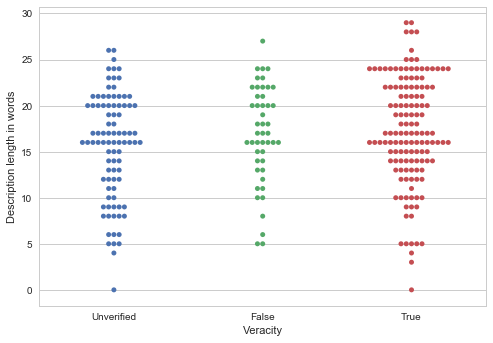

In [42]:
sns.swarmplot(y="Description length in words", x="Veracity", data = data)

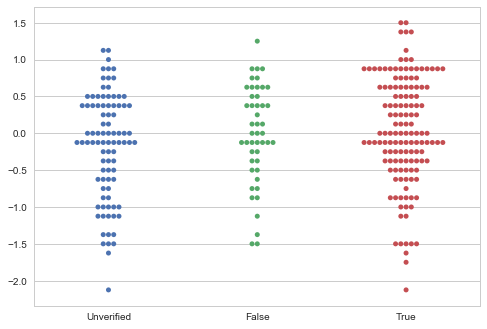

In [43]:
sns.swarmplot(y=x_new_scaled, x=y_new)